### Story 1

**Waheeb Algabri**

DATA 608: Infrastructure Investment & Jobs Act Funding Allocation


### Introduction

The Infrastructure Investment and Jobs Act (IIJA) is a significant federal initiative aimed at improving infrastructure across the United States. This report investigates the distribution of IIJA funding by state and territory, assessing whether the allocation is equitable in terms of population and whether any political bias is evident in favor of the Biden administration. Two key questions guide this story :

Is the IIJA funding allocation equitable based on the population of each state and territory?
Does the allocation favor the political interests of the Biden administration, potentially reflecting a bias toward states that supported President Biden in the 2020 election?
To address these questions, data on IIJA funding, state and territory populations, and 2020 presidential election results will be analyzed and visualized.

### Data Sources

Data Sources
IIJA Funding Data: The Excel file IIJA FUNDING AS OF MARCH 2023.xlsx, shared by Professor Peter Kowalchuk, provides data on the funding allocated to each state and territory.
Population Data: Population estimates for each state and territory were sourced from [State Population Totals and Components of Change: 2020-2023](https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html)

Election Data: The official 2020 Presidential election results were obtained from the assignment.

### Data Preparation

**Load required libraries**

In [ ]:
!pip install us # install the missing module 'us'
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import json
import numpy as np
import matplotlib.patches as mpatches
import us
import re

**Read in and Clean Data**

In [ ]:
# First, let's read our data into a pandas dataframe
df = pd.read_excel("/content/IIJA FUNDING AS OF MARCH 2023.xlsx")
df.head()

,"State, Teritory or Tribal Nation",Total (Billions)
0,ALABAMA,3.0000
1,ALASKA,3.7000
2,AMERICAN SAMOA,0.0686
3,ARIZONA,3.5000
4,ARKANSAS,2.8000


In [ ]:
df.columns = ['state', 'spending']
df.state = df.state.str.lower()
df.loc[df.state == 'deleware', 'state'] = 'delaware'

display(df.head(), df.tail())

,state,spending
0,alabama,3.0000
1,alaska,3.7000
2,american samoa,0.0686
3,arizona,3.5000
4,arkansas,2.8000


,state,spending
52,virginia,4.5
53,washington,4.0
54,west virginia,2.0
55,wisconsin,2.8
56,wyoming,2.3


**Population Data**

In [ ]:
# Source: Census.gov
population = pd.read_excel(
    'https://www2.census.gov/programs-surveys/popest/tables/2020-2023/state/totals/NST-EST2023-POP.xlsx',
    engine='openpyxl', header=3
)

population.columns = ['state', 'pop_base', 'pop2020', 'pop2021', 'pop2022', 'pop2023']
population.state = population.state.str.replace('.', '', regex=False)
population.state = population.state.str.lower()
population = population.dropna(axis=0, how='any')

display(population.head(7), population.tail())

,state,pop_base,pop2020,pop2021,pop2022,pop2023
0,united states,331464948.0,331526933.0,332048977.0,333271411.0,334914895.0
1,northeast,57614141.0,57430477.0,57243423.0,57026847.0,56983517.0
2,midwest,68987296.0,68969794.0,68850246.0,68783028.0,68909283.0
3,south,126268529.0,126465281.0,127353282.0,128702030.0,130125290.0
4,west,78594982.0,78661381.0,78602026.0,78759506.0,78896805.0
5,alabama,5024294.0,5031864.0,5050380.0,5073903.0,5108468.0
6,alaska,733374.0,732964.0,734923.0,733276.0,733406.0


,state,pop_base,pop2020,pop2021,pop2022,pop2023
52,washington,7705267.0,7724566.0,7741433.0,7784477.0,7812880.0
53,west virginia,1793713.0,1791562.0,1785249.0,1774035.0,1770071.0
54,wisconsin,5893713.0,5896700.0,5879978.0,5890543.0,5910955.0
55,wyoming,576850.0,577664.0,579548.0,581629.0,584057.0
57,puerto rico,3285874.0,3281557.0,3262693.0,3220113.0,3205691.0


**Party Data**

In [ ]:
# source: https://electionlab.mit.edu/data
election_results = pd.read_csv('https://raw.githubusercontent.com/waheeb123/Datasets/main/1976-2020-president.csv')
election_results = election_results.loc[election_results.year == 2020]

idx = election_results.groupby('state')['candidatevotes'].idxmax()
state_by_winner = election_results.loc[idx]
state_by_winner = state_by_winner[['state', 'candidate']]
state_by_winner['party'] = np.where(state_by_winner['candidate'] == 'BIDEN, JOSEPH R. JR', 'dem', 'rep')
state_by_winner['state'] = state_by_winner['state'].str.lower()

display(state_by_winner.head(), state_by_winner.tail())

,state,candidate,party
3741,alabama,"TRUMP, DONALD J.",rep
3745,alaska,"TRUMP, DONALD J.",rep
3752,arizona,"BIDEN, JOSEPH R. JR",dem
3771,arkansas,"TRUMP, DONALD J.",rep
3773,california,"BIDEN, JOSEPH R. JR",dem


,state,candidate,party
4252,virginia,"BIDEN, JOSEPH R. JR",dem
4256,washington,"BIDEN, JOSEPH R. JR",dem
4264,west virginia,"TRUMP, DONALD J.",rep
4267,wisconsin,"BIDEN, JOSEPH R. JR",dem
4281,wyoming,"TRUMP, DONALD J.",rep


In [ ]:
# according to https://www.newsweek.com/expanding-map-swing-states-that-will-decide-2024-election-1819263 &
# https://amac.us/newsline/elections/swing-states-2024/
swing_states = [
    'arizona', 'florida', 'georgia', 'indiana', 'iowa', 'michigan',
    'north carolina', 'ohio', 'pennsylvania', 'wisconsin'
]

**GDP Data**

In [ ]:
# source: Bureau of Economic Analysis
gdp = pd.read_excel('https://www.bea.gov/sites/default/files/2023-12/stgdppi3q23.xlsx', engine='openpyxl', header=3)

gdp = gdp.loc[:, ['Unnamed: 0','2022.1']]
gdp.columns = ['state', 'real_gdp']
gdp = gdp.dropna(axis=0, how='any')
gdp.state = gdp.state.str.strip().str.lower()

display(gdp.head(), gdp.tail())

,state,real_gdp
2,united states,21822037
3,new england,1140308
4,connecticut,276669
5,maine,72414
6,massachusetts,604358


,state,real_gdp
58,hawaii,85211
59,nevada,187226
60,oregon,254708
61,washington,641144
62,overseas activity2,...


**Debt & Infrastructure Spending Data**

In [ ]:
# Source: Census.gov
finances = pd.read_excel(
    'https://www2.census.gov/programs-surveys/gov-finances/tables/2021/21slsstab1.xlsx',
    engine='openpyxl', header=10, index_col=1
)

states = []
current_state = None

for col in finances.columns:
    current_state = col.lower() if 'Unnamed' not in col else current_state
    states.append(current_state)

finances.iloc[1,:] = states

finances.columns = states

# finances = finances.loc[:, (finances.iloc[0, :] == 'State & local') & (finances.iloc[2, :] == 'amount1')]
finances = finances.loc[:, finances.iloc[0, :] == ' State']

finances.index = finances.index.str.strip()

finances = pd.DataFrame({
    'state' : finances.T.index, # loc['Debt outstanding'].
    'revenue' : finances.loc['Revenue1'].T,
    'debt' : finances.loc['Debt outstanding'].T,
    'infrastructure' : (
        finances.loc['Expenditure1':].loc['Highways'].T +
        finances.loc['Expenditure1':].loc['Air transportation (airports)'].T +
        finances.loc['Expenditure1':].loc['Parking facilities'].T +
        finances.loc['Expenditure1':].loc['Sea and inland port facilities'].T +
        finances.loc['Expenditure1':].loc['Utility expenditure'].T
    )
})
finances = finances.reset_index(drop=True)

display(finances.head(), finances.tail())

,state,revenue,debt,infrastructure
0,united states total,3975040333,1208170688,164442737
1,alabama,43769959,9118128,1720709
2,alaska,14186218,5652311,1482688
3,arizona,68592195,8969733,1336701
4,arkansas,42968905,7868953,1589453


,state,revenue,debt,infrastructure
47,virginia,97747751,31041855,5554361
48,washington,102871984,30206602,2450061
49,west virginia,22371082,13368743,1663989
50,wisconsin,65795068,21978336,2185640
51,wyoming,8179668,924246,620168


**Road Miles Data**

In [ ]:
# source: https://www.fhwa.dot.gov/policyinformation/statistics/2021/hm60.cfm
roads = pd.read_csv('https://raw.githubusercontent.com/waheeb123/Datasets/main/Road%20Miles%20Data.csv')

roads.index = roads.iloc[:,0]
roads.index.name = 'State'
roads.index = roads.index.str.lower()

roads.columns = roads.iloc[0,:] + ' ' + roads.iloc[1,:] + ' ' + roads.iloc[2,:]

roads = roads['TOTAL LANE MILES']
roads = roads.dropna()
roads = roads.iloc[4:]
roads.name = 'road_miles'

roads = pd.to_numeric(roads.str.replace(',', ''))

roads = roads.rename(index={'maine  (3)':'maine'})

print(roads.head(), roads.tail())

State
alaska         35927
arizona       162428
arkansas      204358
california    400218
colorado      186199
Name: road_miles, dtype: int64 State
wisconsin       239518
wyoming          62588
u.s. total     8823515
puerto rico      41587
grand total    8865103
Name: road_miles, dtype: int64


**Land Area Data**

In [ ]:
# source: https://www.census.gov/geographies/reference-files/2010/geo/state-area.html
land_area = pd.read_csv('https://raw.githubusercontent.com/waheeb123/Datasets/main/landArea_census.csv')

land_area = land_area.loc[:, [x for x in land_area.columns if 'Unnamed' not in x and 'Internal' not in x]]
land_area.columns = ['state', 'total_area', 'land_area', 'water_area']

land_area = land_area.dropna(axis=0, how='any')

land_area.state = land_area.state.str.lower()
land_area.state = land_area.state.str.replace('[0-9:]', '', regex=True)

for col in land_area.columns[1:]:
    land_area[col] = pd.to_numeric(land_area[col].str.replace(',', ''))

display(land_area.head(), land_area.tail())

,state,total_area,land_area,water_area
2,total,3805927,3535932,269995
4,united states,3796742,3531905,264837
5,alabama,52420,50645,1775
6,alaska,665384,570641,94743
7,arizona,113990,113594,396


,state,total_area,land_area,water_area
59,island areas,3860,603,3257
60,american samoa,581,76,505
61,guam,571,210,361
62,northern mariana islands,1976,182,1793
63,u.s. virgin islands,733,134,599


**Merge Datasets**

In [ ]:
display(population.state[~population.state.isin(df.state)], df.state[~df.state.isin(population.state)])

,state
0,united states
1,northeast
2,midwest
3,south
4,west


,state
2,american samoa
12,guam
37,northern mariana islands
48,tribal communities
49,us virgin islands


In [ ]:
data = pd.merge(population, df, on='state', how='inner')
data = pd.merge(data, state_by_winner, on='state', how='inner')
data = pd.merge(data, finances, on='state', how='inner') ## FIX TO KEEP PR
data = pd.merge(data, gdp, on='state', how='inner')
data = pd.merge(data, land_area, on='state', how='inner')
data = pd.merge(data, roads, left_on='state', right_index=True, how='inner')

# data = data.drop([x for x in data.columns if 'state' in x], axis=1)

data['spending_per_capita'] = (data['spending'] * 10**9) / data['pop2023']
data['debt_per_capita'] = (data['debt'] * 1000) / data['pop2023']
data['party_alt'] = np.where(data['state'].isin(swing_states), 'swing', data['party'])

mapping = us.states.mapping('name', 'abbr')
mapping = {key.lower(): value for key, value in mapping.items()}

data['area_abbr'] = data['state'].map(mapping)
data.loc[data.area_abbr.isnull(), 'area_abbr'] = 'DC'

print(f'Shape: {data.shape}\n\n')
display(data.head(), data.tail())

Shape: (50, 21)




,state,pop_base,pop2020,pop2021,pop2022,pop2023,spending,candidate,party,revenue,...,infrastructure,real_gdp,total_area,land_area,water_area,road_miles,spending_per_capita,debt_per_capita,party_alt,area_abbr
1,alaska,733374.0,732964.0,734923.0,733276.0,733406.0,3.7,"TRUMP, DONALD J.",rep,14186218,...,1482688,50315,665384,570641,94743,35927,5044.954636,7706.933131,rep,AK
2,arizona,7157902.0,7186683.0,7272487.0,7365684.0,7431344.0,3.5,"BIDEN, JOSEPH R. JR",dem,68592195,...,1336701,403474,113990,113594,396,162428,470.978063,1207.013563,swing,AZ
3,arkansas,3011490.0,3014348.0,3028443.0,3046404.0,3067732.0,2.8,"TRUMP, DONALD J.",rep,42968905,...,1589453,137356,53179,52035,1143,204358,912.726405,2565.071851,rep,AR
4,california,39538212.0,39503200.0,39145060.0,39040616.0,38965193.0,18.4,"BIDEN, JOSEPH R. JR",dem,658433234,...,14331529,3167461,163695,155779,7916,400218,472.216319,3703.657852,dem,CA
5,colorado,5773707.0,5785219.0,5811596.0,5841039.0,5877610.0,3.2,"BIDEN, JOSEPH R. JR",dem,60456263,...,1586688,416114,104094,103642,452,186199,544.438981,3798.909931,dem,CO


,state,pop_base,pop2020,pop2021,pop2022,pop2023,spending,candidate,party,revenue,...,infrastructure,real_gdp,total_area,land_area,water_area,road_miles,spending_per_capita,debt_per_capita,party_alt,area_abbr
46,virginia,8631373.0,8637193.0,8657348.0,8679099.0,8715698.0,4.5,"BIDEN, JOSEPH R. JR",dem,97747751,...,5554361,576964,42775,39490,3285,164769,516.309767,3561.602869,dem,VA
47,washington,7705267.0,7724566.0,7741433.0,7784477.0,7812880.0,4.0,"BIDEN, JOSEPH R. JR",dem,102871984,...,2450061,641144,71298,66456,4842,165099,511.975098,3866.257001,dem,WA
48,west virginia,1793713.0,1791562.0,1785249.0,1774035.0,1770071.0,2.0,"TRUMP, DONALD J.",rep,22371082,...,1663989,76526,24230,24038,192,80135,1129.898179,7552.659187,rep,WV
49,wisconsin,5893713.0,5896700.0,5879978.0,5890543.0,5910955.0,2.8,"BIDEN, JOSEPH R. JR",dem,65795068,...,2185640,335688,65496,54158,11339,239518,473.696721,3718.237747,swing,WI
50,wyoming,576850.0,577664.0,579548.0,581629.0,584057.0,2.3,"TRUMP, DONALD J.",rep,8179668,...,620168,37294,97813,97093,720,62588,3937.971808,1582.458561,rep,WY


### Plots

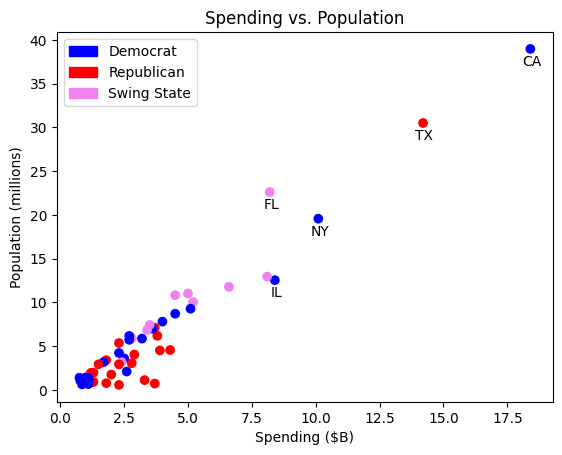

In [ ]:
data = data.sort_values(by='spending', ascending=False, ignore_index=True)

color_map = {'dem':'blue', 'rep':'red', 'swing':'violet'}
colors = [color_map[party] for party in data.party_alt]

fig, ax = plt.subplots()

ax.scatter(data.spending, data.pop2023 / 10**6, color=colors)
ax.set_xlabel('Spending ($B)')
ax.set_ylabel('Population (millions)')
ax.set_title('Spending vs. Population')

blue_patch = mpatches.Patch(color = 'blue', label = 'Democrat')
red_patch = mpatches.Patch(color = 'red', label = 'Republican')
purple_patch = mpatches.Patch(color = 'violet', label = 'Swing State')
ax.legend(handles = [blue_patch, red_patch, purple_patch])

for i, label in enumerate(data[:5].area_abbr):
    plt.annotate(
        label, (data.spending[i], data.pop2023[i] / 10**6),
        textcoords="offset points", xytext=(1,-12), ha='center',
    )

plt.show()

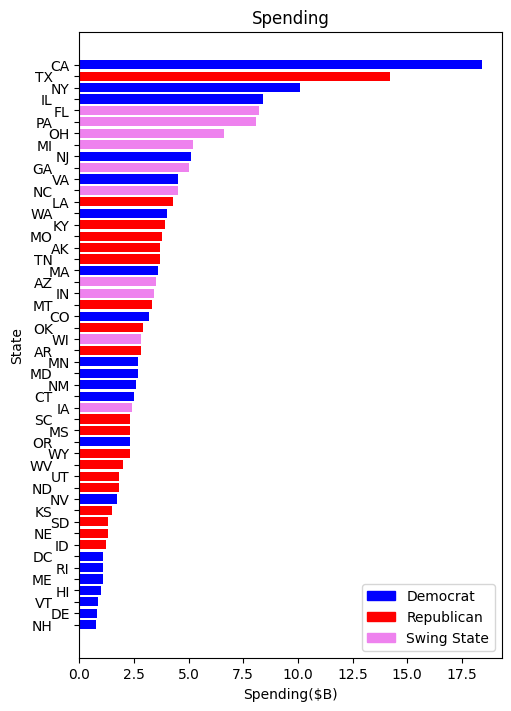

In [ ]:
data = data.sort_values(by='spending', ascending=True, ignore_index=True)
colors = [color_map[party] for party in data.party_alt]

fig, ax = plt.subplots(layout='constrained', figsize=(5, 7))
ax.barh(data.area_abbr, data.spending, color=colors)
ax.set_title('Spending')
ax.set_xlabel('Spending($B)')
ax.set_ylabel('State')

for i, label in enumerate(ax.get_yticklabels()):
    if i % 2 == 0:
        label.set_position((-0.04, 0))

blue_patch = mpatches.Patch(color = 'blue', label = 'Democrat')
red_patch = mpatches.Patch(color = 'red', label = 'Republican')
purple_patch = mpatches.Patch(color = 'violet', label = 'Swing State')
ax.legend(handles = [blue_patch, red_patch, purple_patch])

plt.show()

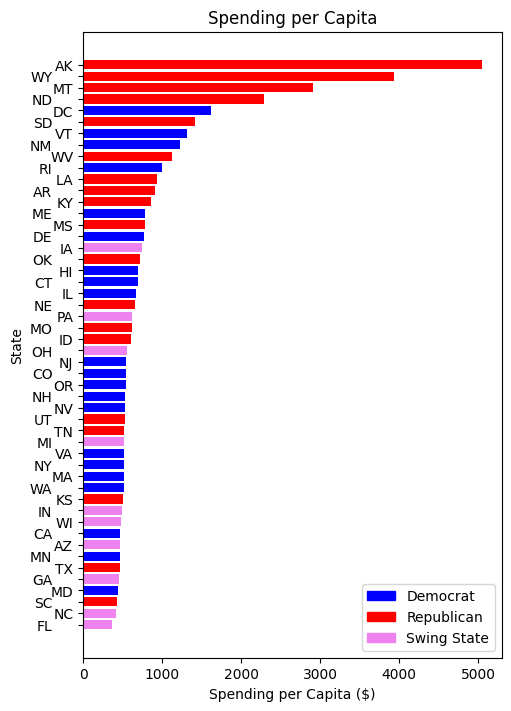

In [ ]:
data = data.sort_values(by = 'spending_per_capita')

fig, ax = plt.subplots(layout='constrained', figsize=(5, 7))
for i in range(len(data)):
    row = data.iloc[i]
    bar = ax.barh(
        row['area_abbr'], row['spending_per_capita'],
        color = color_map[row['party_alt']],
    )
ax.set_title('Spending per Capita')
ax.set_xlabel('Spending per Capita ($)')
ax.set_ylabel('State')

blue_patch = mpatches.Patch(color = 'blue', label = 'Democrat')
red_patch = mpatches.Patch(color = 'red', label = 'Republican')
purple_patch = mpatches.Patch(color = 'violet', label = 'Swing State')
ax.legend(handles = [blue_patch, red_patch, purple_patch])

for i, label in enumerate(ax.get_yticklabels()):
    if i % 2 == 0:
        label.set_position((-0.05, 0))

plt.show()

In [ ]:
denominators = {
    'pop2023':'Spending per Capita',
    'real_gdp':'Spending per Dollar of Real GDP',
    'debt':'Spending per Dollar of State Debt',
    'infrastructure':'Spending per Dollar of Annual Infrastructure Spending',
    'road_miles':'Spending per Mile of Road',
    'land_area':'Spending per Square Mile of Land Area',
}

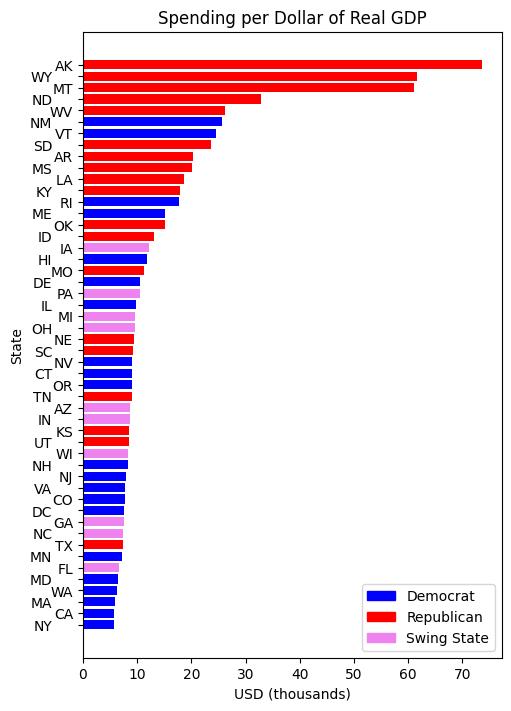

In [ ]:
denominator = 'real_gdp'

data['new_col'] = data['spending'] * 10**9 / data[denominator] / 1000
data = data.sort_values(by='new_col')
color_map = {'dem':'blue', 'rep':'red', 'swing':'violet'}

fig, ax = plt.subplots(layout='constrained', figsize=(5, 7))
for i in range(len(data)):
    row = data.iloc[i]
    bar = ax.barh(
        row['area_abbr'], row['new_col'],
        color = color_map[row['party_alt']],
    )
ax.set_title(denominators[denominator])
ax.set_xlabel('USD (thousands)')
ax.set_ylabel('State')

blue_patch = mpatches.Patch(color = 'blue', label = 'Democrat')
red_patch = mpatches.Patch(color = 'red', label = 'Republican')
purple_patch = mpatches.Patch(color = 'violet', label = 'Swing State')
ax.legend(handles = [blue_patch, red_patch, purple_patch])

for i, label in enumerate(ax.get_yticklabels()):
    if i % 2 == 0:
        label.set_position((-0.05, 0))

data.drop('new_col', axis = 1, inplace = True)

plt.show()

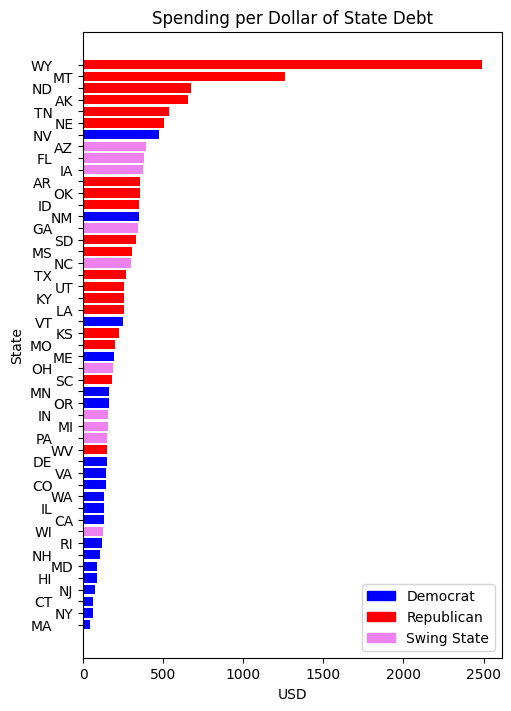

In [ ]:
denominator = 'debt'

data_no_zero = data.loc[data[denominator] != 0, :].copy()

data_no_zero['new_col'] = data_no_zero['spending'] * 10**9 / data_no_zero[denominator]
data_no_zero = data_no_zero.sort_values(by='new_col')
color_map = {'dem':'blue', 'rep':'red', 'swing':'violet'}

fig, ax = plt.subplots(layout='constrained', figsize=(5, 7))
for i in range(len(data_no_zero)):
    row = data_no_zero.iloc[i]
    bar = ax.barh(
        row['area_abbr'], row['new_col'],
        color = color_map[row['party_alt']],
    )
ax.set_title(denominators[denominator])
ax.set_xlabel('USD')
ax.set_ylabel('State')

blue_patch = mpatches.Patch(color = 'blue', label = 'Democrat')
red_patch = mpatches.Patch(color = 'red', label = 'Republican')
purple_patch = mpatches.Patch(color = 'violet', label = 'Swing State')
ax.legend(handles = [blue_patch, red_patch, purple_patch])

for i, label in enumerate(ax.get_yticklabels()):
    if i % 2 == 0:
        label.set_position((-0.05, 0))

data_no_zero.drop('new_col', axis = 1, inplace = True)

plt.show()

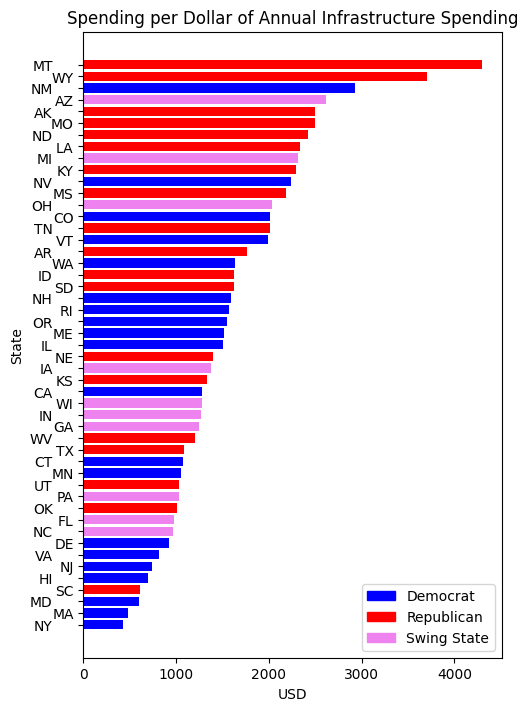

In [ ]:
denominator = 'infrastructure'

data_no_zero = data.loc[data[denominator] != 0, :].copy()

data_no_zero['new_col'] = data_no_zero['spending'] * 10**9 / data_no_zero[denominator]
data_no_zero = data_no_zero.sort_values(by='new_col')
color_map = {'dem':'blue', 'rep':'red', 'swing':'violet'}

fig, ax = plt.subplots(layout='constrained', figsize=(5, 7))
for i in range(len(data_no_zero)):
    row = data_no_zero.iloc[i]
    bar = ax.barh(
        row['area_abbr'], row['new_col'],
        color = color_map[row['party_alt']],
    )
ax.set_title(denominators[denominator])
ax.set_xlabel('USD')
ax.set_ylabel('State')

blue_patch = mpatches.Patch(color = 'blue', label = 'Democrat')
red_patch = mpatches.Patch(color = 'red', label = 'Republican')
purple_patch = mpatches.Patch(color = 'violet', label = 'Swing State')
ax.legend(handles = [blue_patch, red_patch, purple_patch])

for i, label in enumerate(ax.get_yticklabels()):
    if i % 2 == 0:
        label.set_position((-0.05, 0))

data_no_zero.drop('new_col', axis = 1, inplace = True)

plt.show()

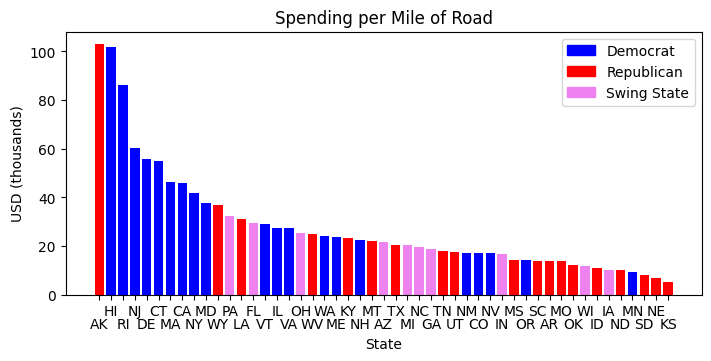

In [ ]:
denominator = 'road_miles'

data_no_zero = data.loc[data.area_abbr != 'DC', :].copy()

data_no_zero['new_col'] = data_no_zero['spending'] * 10**9 / data_no_zero[denominator] / 1000
data_no_zero = data_no_zero.sort_values(by='new_col', ascending=False)
color_map = {'dem':'blue', 'rep':'red', 'swing':'violet'}

fig, ax = plt.subplots(layout='constrained', figsize=(7, 3.5))
for i in range(len(data_no_zero)):
    row = data_no_zero.iloc[i]
    bar = ax.bar(
        row['area_abbr'], row['new_col'],
        color = color_map[row['party_alt']],
    )
ax.set_title(denominators[denominator])
ax.set_ylabel('USD (thousands)')
ax.set_xlabel('State')

blue_patch = mpatches.Patch(color = 'blue', label = 'Democrat')
red_patch = mpatches.Patch(color = 'red', label = 'Republican')
purple_patch = mpatches.Patch(color = 'violet', label = 'Swing State')
ax.legend(handles = [blue_patch, red_patch, purple_patch])

for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 == 0:
        label.set_position((0, -0.05))

data_no_zero.drop('new_col', axis = 1, inplace = True)

plt.show()

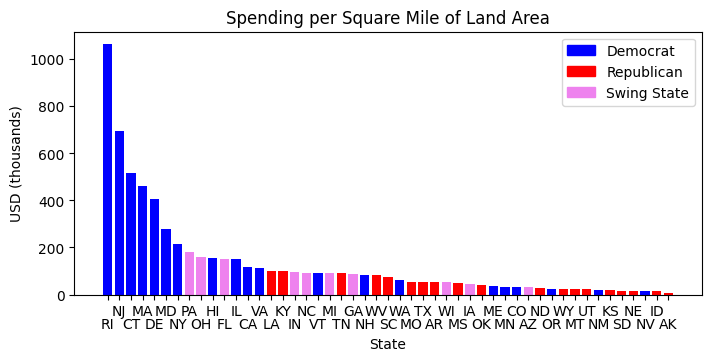

In [ ]:
denominator = 'land_area'

data_no_zero = data.loc[data.area_abbr != 'DC', :].copy()

data_no_zero['new_col'] = data_no_zero['spending'] * 10**9 / data_no_zero[denominator] / 1000
data_no_zero = data_no_zero.sort_values(by='new_col', ascending=False)
color_map = {'dem':'blue', 'rep':'red', 'swing':'violet'}

fig, ax = plt.subplots(layout='constrained', figsize=(7, 3.5))
for i in range(len(data_no_zero)):
    row = data_no_zero.iloc[i]
    bar = ax.bar(
        row['area_abbr'], row['new_col'],
        color = color_map[row['party_alt']],
    )
ax.set_title(denominators[denominator])
ax.set_ylabel('USD (thousands)')
ax.set_xlabel('State')

blue_patch = mpatches.Patch(color = 'blue', label = 'Democrat')
red_patch = mpatches.Patch(color = 'red', label = 'Republican')
purple_patch = mpatches.Patch(color = 'violet', label = 'Swing State')
ax.legend(handles = [blue_patch, red_patch, purple_patch])

for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 == 0:
        label.set_position((0, -0.05))

data_no_zero.drop('new_col', axis = 1, inplace = True)

plt.show()